<a href="https://colab.research.google.com/github/KelvinLam05/store_sales_prediction/blob/main/store_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project**

We are provided with historical sales data for 45 Walmart stores located in different regions, and we are tasked with predicting the weekly sales for each store.


**Load the packages**

In [86]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Load the data**

In [87]:
# Load dataset
df = pd.read_csv('/content/store_sales.csv')

In [88]:
# Change the data frame's column names to lower case
df = df.rename(columns = str.lower)

In [89]:
# Examine the data
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [90]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


**Changing a date string to a datetime**

To change a string or object data type to a datetime or datetime64[ns] data type we can use the Pandas to_datetime( ) function.

In [91]:
df['date'] = pd.to_datetime(df['date'])

To confirm that we have successfully completed our first step of converting our date string to a datetime, we can re-run info( ) and check that the Dtype column of the new date column is set to datetime64[ns]. Now this is in the right format, we can reformat it to a wide range of different date features.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


**Feature engineering**

Next, we will calculate the leap_year, quarter and day_of_month for each date in our dataframe.

In [93]:
df['leap_year'] = df['date'].dt.is_leap_year
df['quarter'] = df['date'].dt.quarter
df['day_of_month'] = df['date'].dt.day

In [94]:
# Drop the date column 
df.drop('date', axis = 1, inplace = True)

**Create a correlation heatmap**

Creating a correlation heatmap is a good way to visualise potential collinearity.

In [95]:
features = df.copy()

In [96]:
features.drop(['weekly_sales'], axis = 1, inplace = True)

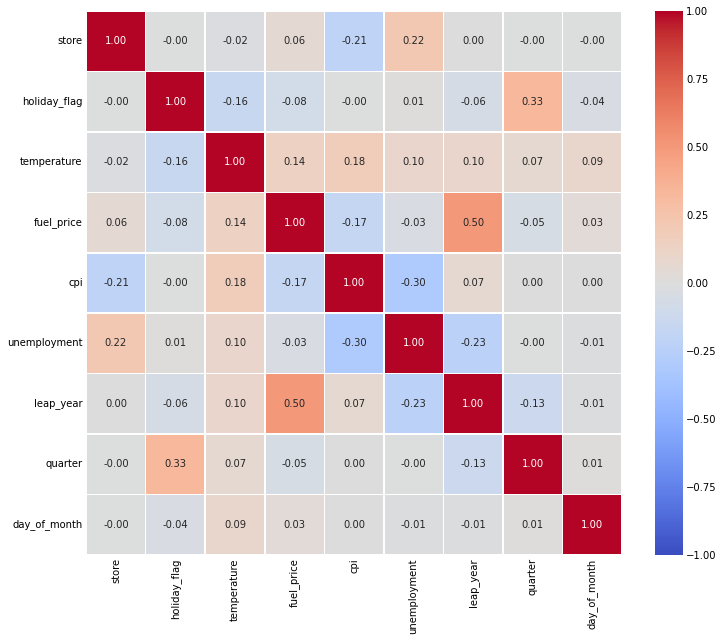

In [97]:
plt.figure(figsize = (12, 10))
ax = sns.heatmap(features.corr(), annot = True, fmt = '.2f', vmin = -1, vmax = 1, cmap = 'coolwarm', linewidths = .5)
ax.tick_params(axis = 'both', which = 'both', length = 0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(size = 0)
plt.show()

From the above correlation heatmap, one could get some of the following information:

* Variables such as leap_year & fuel_price are having strong positive correlation. Generally speaking, pearson correlation coefficient value greater than 0.8 indicates the presence of multi-collinearity.


* There are several variables which have no correlation and whose correlation value is near to 0.

**Split the training and test data**

Next we will split our dataset into the X feature set and the y target data, and we will use the train_test_split( ) function to create our test and training datasets.

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = df.drop(['weekly_sales'], axis = 1) 

In [100]:
y = df['weekly_sales']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Scale the data**

Since the data currently exist with different scales - some values are very large while others are very small - the RobustScaler( ) technique can be used to re-scale the data so it’s uniform. The fit_transform( ) function is used on the X_train data, while the transform( ) function is used on X_test to avoid potentially “leaking” data.

In [102]:
from sklearn.preprocessing import RobustScaler

In [103]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Apply model selection**

To undertake the model selection step, we first need to create a dictionary containing the name of each model we want to test, and the name of the model class, i.e. XGBRegressor( ).

In [104]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import Ridge
from sklearn.linear_model import LarsCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [105]:
regressors = {'XGBRegressor': XGBRegressor(objective = 'reg:squarederror', random_state = 42),
              'LGBMRegressor': LGBMRegressor(random_state = 42),
              'DummyRegressor': DummyRegressor(),
              'DecisionTreeRegressor': DecisionTreeRegressor(random_state = 42),
              'KNeighborsRegressor': KNeighborsRegressor(),
              'Lars': Lars(normalize = False, random_state = 42),
              'Ridge': Ridge(random_state = 42),
              'LarsCV': LarsCV(normalize = False),
              'RidgeCV': RidgeCV(),
              'LassoCV': LassoCV(random_state = 42),
              'ElasticNet': ElasticNet(random_state = 42),
              'SGDRegressor': SGDRegressor(random_state = 42),
              'ARDRegression': ARDRegression(),
              'BayesianRidge': BayesianRidge(),
              'GammaRegressor': GammaRegressor(),
              'HuberRegressor': HuberRegressor(max_iter = 1000),
              'RANSACRegressor': RANSACRegressor(random_state = 42),
              'LinearRegression': LinearRegression(),
              'PoissonRegressor': PoissonRegressor(max_iter = 1000),
              'TweedieRegressor': TweedieRegressor(),
              'OrthogonalMatchingPursuit': OrthogonalMatchingPursuit(normalize = False),
              'SVR': SVR(),
              'NuSVR': NuSVR(),
              'LinearSVR': LinearSVR(random_state = 42),
              'BaggingRegressor': BaggingRegressor(random_state = 42),
              'RandomForestRegressor': RandomForestRegressor(random_state = 42),
              'GradientBoostingRegressor': GradientBoostingRegressor(random_state = 42),
              'HistGradientBoostingRegressor': HistGradientBoostingRegressor(random_state = 42)}

Next we will create a Pandas dataframe into which we will store the data. Then we will loop over each of the models, fit it using the X_train and y_train data, then generate predictions from X_test and calculate the mean R-squared from 10 rounds of cross-validation. That will give us the R-squared for the X_test data, plus the average R-squared for the training data set.

In [106]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [107]:
df_models = pd.DataFrame(columns = ['model', 'run_time', 'r2_score_cv', 'r2_score'])

for key in regressors:

    print('*', key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cv = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 10, n_jobs = -1)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time) / 60, 2)),
           'r2_score_cv': cv.mean(),
           'r2_score': r2_score(y_test, y_pred)}

    df_models = df_models.append(row, ignore_index = True)

* XGBRegressor
* LGBMRegressor
* DummyRegressor
* DecisionTreeRegressor
* KNeighborsRegressor
* Lars
* Ridge
* LarsCV
* RidgeCV
* LassoCV
* ElasticNet
* SGDRegressor
* ARDRegression
* BayesianRidge
* GammaRegressor
* HuberRegressor
* RANSACRegressor
* LinearRegression
* PoissonRegressor
* TweedieRegressor
* OrthogonalMatchingPursuit
* SVR
* NuSVR
* LinearSVR
* BaggingRegressor
* RandomForestRegressor
* GradientBoostingRegressor
* HistGradientBoostingRegressor


Perhaps unsurprisingly, HistGradientBoostingRegressor came out on top.

In [108]:
df_models = df_models.sort_values(by = 'r2_score_cv', ascending = False)
df_models.head()

,model,run_time,r2_score_cv,r2_score
27,HistGradientBoostingRegressor,0.08,0.973181,0.972979
1,LGBMRegressor,0.03,0.971939,0.973062
25,RandomForestRegressor,0.27,0.946466,0.944013
24,BaggingRegressor,0.03,0.938888,0.939510
3,DecisionTreeRegressor,0.01,0.908642,0.907557


**Assess the top performing model**

Next, we will fit the the HistGradientBoostingRegressor(random_state = 42) model to the data using its default parameters and plot the performance of the predictions against the actual values. As you can see, this is already looking pretty good.

In [109]:
regressor = HistGradientBoostingRegressor(random_state = 42)
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

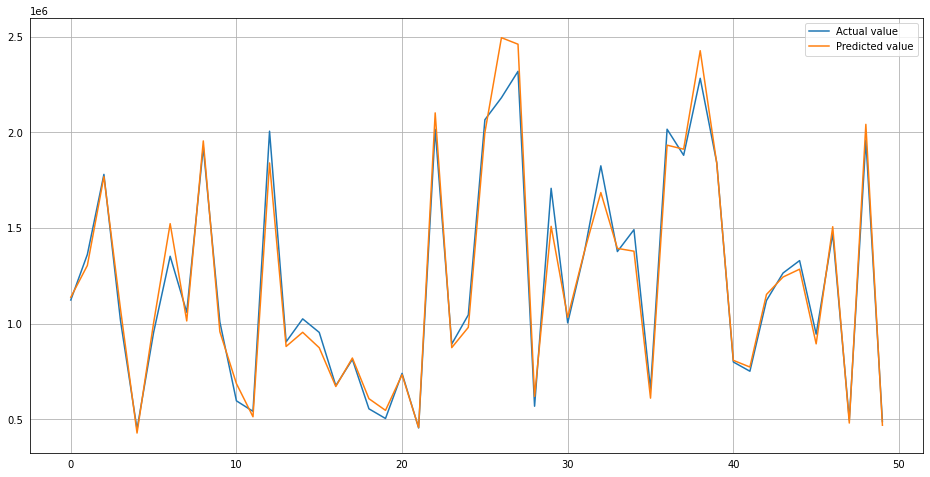

In [110]:
test = pd.DataFrame({'Predicted value': y_pred, 'Actual value': y_test})
fig = plt.figure(figsize = (16, 8))
test = test.reset_index()
test = test.drop(['index'], axis = 1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])
plt.tick_params(left = False, bottom = False)
plt.grid()